# Coursework 1 - Mathematics for Machine Learning

## CID: 01847210

**Colab link:** [insert colab link here](https://colab.research.google.com/drive/1JvTv58T4wFfVl_h9RE7WFRvieAVY07nG?usp=sharing)

***
***

## Part 1: Quickfire questions [3 points]

#### Question 1 (True risk / Empirical risk):

True risk for a model f is the theoretical expected loss for a chosen loss function L over the entire data distribution. The empirical risk for a model f is the average loss over the training data. The core difference between the two is that empirical risk is an approximation of the true risk, and the true risk cannot be calculated without knowing the true distribution of the data. The expected value of the empirical risk is the true risk.

#### Question 2 ('Large' or 'rich' hypothesis class):

A rich hypothesis class has the benfit of being able to fit many kinds of functions, which makes it very flexible which is useful when there is little information about the underlying distribution. This also makes them more likely to overfit the data tightly to the dataset, for example by fitting irrelevant patterns like noise, which gives it a larger generalisation error. Although complex models can find more intricate patterns, they require more data to reach fixed lower generalisation error, and Training with a rich hypothesis class will also be much more time consuming and computationally expensive.

#### Question 3 (Dataset splitting):

Assuming large dataset, it is fair to expect the performance of the selected model on the validation dataset to match its performance on the unseen data so long as the unseen data is sampled in the same way. The model may be more accurate for some inputs over others so if the unseen data is being sampled differently we may not expect this to be the case. However, selecting the model based on its generalisation to the test data may result in selection bias.

#### Question 4 (Occam’s razor):

Occam's razor is the principle that given multiple models that make the same predictions, we should choose the simplest model. In machine learning with real world data this means the simplest model is least likely to overfit the data. For example an image will have basic visual features we would like the model to identify, so if two models do an equally good job we should assume the simpler model is the true model.

#### Question 5 (Generalisation error):

The generalisation error for a model is the difference in its performance across the train data and the test data. A small generalisation error indicates the model is more reliable and did not overfit the train data, and that the model successfully captured underlying trends in the dataset.

#### Question 6 (Rademacher complexity pt1):

The Rademacher complexity measures the hypothesis class' ability to fit random noise, a high Rademacher complexity of $\mathcal{F}$ implies it is good at fitting noise. Generally speaking this correlates to $\mathcal{F}$ being a rich hypothesis class as it may contain more complex models that are able to fit complex patterns and noise.

#### Question 7 (Rademacher complexity pt2):

Using the generalisation bound inequality, we see the bound becomes greater as the richness of $\mathcal{F}$ increases. Dependence on $|\mathcal{F}|$ may be a potential drawback since the generalisation error is larger for more complex functions that are more able to overfit random noise in the training dataset, while there is a correlation between function complexity and richness of a hypothesis class it does not always have to be true.

 Therefore the function class dependency may give an indication to the nature of the bounds however they do not directly measure the risk of overfitting noise so may give an innacurate bound. The motivation for using the Rademacher complexity as opposed to the function class dependency is that it directly measures how well a function class can fit noise, giving a more accurate bound.

#### Question 8 (Regularisation term in the loss function):

Including a regularisation term in the loss function can help us learn parameters which have prior known properties, which enforces a preference to functions with these properties. Regularisation penalises large parameters, which reduces the capacity for the model to overfit noise. This is a tradeoff in the models ability to fit the data and the model complexity.

#### Question 9 (Momentum gradient descent):

The issue with regular gradient descent of learning at a fixed rate is that too large of a rate will not converge and too small of a rate will converge too slowly, an optimum learning rate for many functions, for example a quadratic in multiple variables with a high condition number, may still perform slowly in one direction and overshoot (avoiding convergence) in another. 

This sparks a motivation for learning with momentum: we want to speed up the descent when the gradient at each step is not changing much, and the opposite for rapidly changing gradients. This method can avoid slow convergence and overshooting by adjusting the step size accordingly, larger when the gradient direction is consistently similar, smaller if the gradient direction is changing frequently.

#### Question 10 (Adam):

The Adaptive movement estimation algorithm is a method that enhances standard gradient descent by integrating concepts from momentum gradient descent and using adaptive learning rates for each parameter. The adaptive learning rate component calculates the first and second moments of the gradients for each parameter. The first moment tells the algorithm the average gradient direction and the second to adjust the step size based on variablity. The momentum component computes an exponentially decaying moving average of past gradients and past gradients squared, this section incorperates the history of the gradients which allows us to implement momentum.

#### Question 11 (AdaGrad):

AdaGrad adjusts the learning rate for each parameter by computing the cumulative history of squared gradients and uses this to scale down the learning rate, this is to ensure parameters that are frequently changing have a lower learning rate to avoid overshooting, and parameters that move less have a higher learning rate to speed up optimisation. However by adjusting the learning rate in this way the step size will always be decreasing, which may lead to premature convergence.

#### Question 12 (Decaying Learning Rate):

The loss landscape often has obstacles such as local minima and saddle points, when the optimizer begins navigating it will have a high learning rate, which is beneficial for both finding the neighborhood of the global minimum efficiently and preventing becoming stuck in a local minima. After the optimizer approaches a minimum point the optimizer will be more able to fine tune the model parameters, and the lower learning rate will prevent overshooting the minima.

***
***

## Part 2: Short-ish proofs [6 points]


### Question 2.1: Bounds on the risk [1 point]


### Connection between Hoeffding's inequality and Corollary 4.6:
Hoeffding's inequality puts bounds on the probability of the difference between $S_m$ and $\mathbb{E}S_m$ being greater than some $\epsilon > 0$, where $S_m$ is the sum of m independent random variables each taking values across a closed interval $[a_i,b_i]$.

$P [S_m - E[S_m] \geq \epsilon] \leq e^{-2\epsilon^2 / \sum_{i=1}^m (b_i - a_i)^2}$

$P [S_m - E[S_m] \leq -\epsilon] \leq e^{-2\epsilon^2 / \sum_{i=1}^m (b_i - a_i)^2}$

Corollory 4.6 states that the probability measure (under the sample distribution) of the difference between the true and empirical risk being greater than some $\epsilon > 0$ is bounded:

$\mathbb{P}_{S \sim D^N} [R(\hat{f}) - R(f) \geq \epsilon] \leq \exp(-2N\epsilon^2)$

$\mathbb{P}_{S \sim D^N} [R(\hat{f}) - R(f) \leq -\epsilon] \leq \exp(-2N\epsilon^2)$

$\mathbb{P}_{S \sim D^N} [|R(\hat{f}) - R(f)| \geq \epsilon] \leq 2\exp(-2N\epsilon^2)$

To arrive at Corollary 4.6 we have to define the true risk and empirical risk as follows:

True Risk: $R(f) = E_{D}[L(f(x), y)]$

Empirical Risk: $\hat{R}(f) = \frac{1}{N} \sum_{i=1}^{N} L(f(x_i), y_i)$

And our hypothesis f is defined on $f : \mathcal{X} \rightarrow \{0, 1\}$ with loss function $L(f(x), y) = 1_{\{f(x) \neq y\}}$.

Now our $L(f(x_i), y_i)$ are iid over the interval $[0,1]$ we can directly apply Hoeffding's inequality to $R(f)$ and $\hat{R}(f)$ noting that $E[\hat{R}(f)] = R(f)$:

$\mathbb{P}_{S \sim D^N} [N \hat{R}(f) - E[N \hat{R}(f)] \geq N\epsilon] \leq e^{-2(N\epsilon)^2 / \sum_{i=1}^N (1 - 0)^2} = e^{-2N\epsilon^2}$ 

or equivalently

$\mathbb{P}_{S \sim D^N} [\hat{R}(f) - R(f)] \geq \epsilon] \leq e^{-2N\epsilon^2}$ 

And the second inequality follows immediately from the same steps. The third inequality follows by the union bound.

### Dependence on the dataset size:

The bound decreases exponentially with the dataset size, making it very efficient. 

### Relevance of $|\mathcal{F}|$

$|\mathcal{F}|$ denotes the cardinality of the hypothesis set, when this is large it implies $\mathcal{F}$ is richer which is beneficial for fitting the train data well. However it also increases the risk of overfitting so the selected model may not generalise well to unseen data. Hence the generalisation bound in theorem 4.8 increases with the cardinality of $\mathcal{F}$, and it increases at a logarithmic scale.


***

### Question 2.2: On semi-definiteness [1 point]

First we will define a function $g(t) := f(x + tv)$ for an arbitrary direction $v \in \mathbb{R}^d$.

$g(t)$ is twice differentiable since f is twice differentiable (chain rule).

Convexity of g follows from convexity of f as follows:

$g(t) = f(x + tv) \geq f(x + sv) + \nabla f(x + sv)^T ((x + tv) - (x + sv))$ which is the convexity condition for g with $x+tv = y$ and $x+sv = x$.

Now taking derivatives of g(t) we obtain $g'(t) = \nabla f(x+tv)^T v$ and $g''(t) = v^T \nabla^2 f(x + tv) v.$

Finally $g:\reals \rightarrow \reals$ is convex $\implies g''(t) \geq 0$. When t = 0 this implies $v^T \nabla^2 f(x) v \geq 0$ for arbitrary v. Hence $\nabla^2 f(x)$ is positive semi-definite as required.


***

### Question 2.3: A quick recap of momentum [1 point]

1. Using the eigenvalue decomposition simplifies the multivariate problem into d linear problems. Eigenvalues are unchanged under a change of basis so this makes it much simpler to obtain the condition number $\frac{\lambda _{max}}{\lambda _{min}}$, which is useful to find the optimal learning rate. Using the change of basis $Q^T(x_k - x^*)$ shifts the extreme point to the origin, and yields the eigenvectors which can tell us the directions of maximum and minimum growth. In the context of momentum, analysing the direction of $w_k$ as opposed to $x_k$ is more intuitive as we can directly analyse the momentum in each principle direction.

2. The downside to using the optimal learning rate for regular gradient descent arises when there is a large condition number on S, the optimizer will still suffer from slow convergence in at least one direction, this is because in the faster convergence directions we need to reduce the learning rate so we do not overshoot the minima. In addition to this calculating the optimal learning rate involves eigenvalue decomposition, which can be computationally intense.

3. The convergence of the algorithm is determined by the largest absolute value of the eigenvalues of R. It converges at a linear rate determined by this value. If the value is one or larger then the algorithm with diverge, since this implies the step size is increasing.

4. The discriminant of R is $(\beta + 1 - \alpha\lambda_i)^2 - 4\beta$. When this is less than zero the solutions/eigenvalues which I will denote $e_1$ and $e_2$ of R are complex. Therefore they must be conjugate to one another, $e_1 = e_2^*$ and hence $|e_1| = |e_2|$. This implies the momentum gradient descent will converge at a rate of $|e_1|$. In conclusion considering the complex roots gives us more efficient convergence in all principle directions as opposed to real roots. In addition to this, rewriting the inequality we obtain: 

$-1 \leq \frac{1+\beta -\alpha \lambda _i}{2 \sqrt{\beta}} \leq 1$, which is exactly the condition we want for convergence.

***

### Question 2.4: Convergence proof [3 points]

1. The evolution of Newtons method is described by the update equation $x_{k+1} = x_k - \left[\nabla^2 f(x_k)\right]^{-1} \nabla f(x_k)$

2. Given the equation $f(x) = \frac{1}{2}x^TQx + b^Tx + c$ with Q positive definite and $x \in \reals ^d$ we want to show that after one iteration of Newtons method we obtain $x^*$.

First calculating $\nabla f(x)$ and $\nabla^2 f(x)$: $\nabla f(x) = Qx + b$ and $\nabla^2 f(x) = Q$ and then substituting into Newtons update equation:

$x_{k+1} = x_k - Q^{-1}(Qx_k + b) = -Q^{-1}b$.

Now to show that this is equal to $x^*$ we can directly solve for $x^*$: $\nabla f(x^*) = 0, x^* = -Q^{-1}b$, and since Q is positive semi-definite this is a minima as required.

Hence for any starting point x we will arrive at $x^*$ in one step.

3. The above statement states that for a thrice continuously differentiable function f with critical point at $x^*$ such that $\nabla^2 f(x^*)$ is invertible then the iterations in Newtons method are well defined and converge to $x^*$ within some neighborhood of $x^*$, which has the implication that $\nabla^2 f(x_k)$ is invertible for every $k \geq 0$ so long as $x_0$ is within this neighborhood. In addition the convergence rate is quadratic.

4. In order to show that $\|x_1 - x^*\| \leq \|(\nabla^2f(x_0))^{-1}\| \|\nabla^2f(x_0)(x_0 - x^*) - \nabla f(x_0)\|$ we should start by subtracting $x^*$ from both sides of the update equation when k=0:

$$x_1 - x^* = (x_0 - x^*) - [\nabla^2 f(x_0)]^{-1} \nabla f(x_0)$$
 
Immediately we can take the norm of both sides, factor the inverse hessian (Since $\nabla^2f$ is a matrix valued function continuous everywhere and invertible at $x^*$, this implies existenece of $\epsilon$ and invertiblility at $x_0$ for some $x_0$ within $\epsilon$ of $x^*$ by lemma 0.2) and apply Lemma 0.1 to obtain the required result:

$$\|x_1 - x^*\| \leq \|(\nabla^2f(x_0))^{-1}\| \|\nabla^2f(x_0)(x_0 - x^*) - \nabla f(x_0)\|$$

5. To show the required result we use the inequality from the previous question:

$$\|x_1 - x^*\| \leq \|(\nabla^2f(x_0))^{-1}\| \|\nabla^2f(x_0)(x_0 - x^*) - \nabla f(x_0)\|$$

To begin let us take the taylor expansion of $\nabla f(x)$ around $x_0: \nabla f(x) = \nabla f(x_0) + \nabla^2 f(x_0)(x - x_0) + O(\|x - x_0\|^2)$
and then evaluate at $x^*$.
With $\nabla f(x^*) = 0$ and substituting into the equation we have:

$$\|x_1 - x^*\| \leq \|(\nabla^2f(x_0))^{-1}\| \|\nabla f(x_0) - \nabla f(x_0) + O(\|x - x_0\|^2)\|$$

We now say that $O(\|x - x_0\|^2) \leq c_1\|x - x_0\|^2$ for some $c_1$ which are determined by the coefficients of the expansion (Taylor's theorem).

Turning our attention to the $\|(\nabla^2f(x_0))^{-1}\|$ which is bounded since $x_0$ is in $B_\epsilon(x^*)$ by lemma 0.2 (Invertibility of the Hessian in the epsilon ball). So letting $c_0 = sup_{x \in B(\epsilon, x^*)} \|(\nabla^2f(x))^{-1}\|$ we have our result:

$$\|x_1 - x^*\| \leq c_1 c_2\|x - x_0\|^2 $$

Note if the supremum was unbounded it would be at the boundary of the epsilon ball, so taking $\epsilon/2$ would suffice to show existence.

6. Given the statement $\|x_0 - x^*\| \leq \frac{\alpha}{c_1c_2}$ we want to show that $x_1 \in B(x^*,\epsilon)
    $ and $ \|x_1 - x^*\| \leq \alpha \frac{1}{c_1 c_2}$. Using the inequality from the last question and substituting the assumed inequality we obtain: 
    $$\|x_1 - x^*\| \leq c_1c_2 \frac{\alpha}{c_1c_2}\|x_0 - x^*\| = \alpha \|x_0 - x^*\| \leq \|x_0 - x^*\| < \epsilon$$
    Since $\alpha \in (0,1)$.
    Hence $x_1$ is in the epsilon ball of $x^*$.
    Substituting once more:
    $$\|x_1 - x^*\| \leq c_1c_2 \left(\frac{\alpha}{c_1c_2}\right)^2$$ 
    Which is equivalent to 
    $$\|x_1 - x^*\| \leq \alpha^2 \frac{1}{c_1c_2}$$
    Finally using $\alpha \in (0,1)$ we have:
    $$\|x_1 - x^*\| < \frac{\alpha}{c_1c_2}$$ 
    as required.

7. If $x_k$ is in the epsilon ball and $\|x_k - x^* \| \leq \frac{\alpha}{c_1c_2}$ for some $\alpha \in (0,1)$ we can apply the same steps as 4, 5 and 6 to obtain $$\|x_{k+1} - x^*\| \leq c_1c_2 \frac{\alpha}{c_1c_2}\|x_k - x^*\| = \alpha \|x_k - x^*\| < \|x_k - x^*\|$$
Which also implies $x_{k+1}$ is in the epsilon ball.

8. We have shown that for $x_0 \in B_{\epsilon}(x^*)$ such that $\|x_0 - x^*\| \leq \frac{\alpha}{c_1c_2}$ for some $\alpha \in (0,1)$ then $ \|x_1 - x^*\| \leq \alpha \frac{1}{c_1 c_2}$, with $x_1$ in the epsilon ball. In part 7 we have shown that for arbitrary k we have if $x_k \in B_\epsilon (x^*)$ and $\|x_k - x^* \| \leq \frac{\alpha}{c_1c_2}$ for some $\alpha \in (0,1)$ then $x_{k+1} \in B_\epsilon (x^*)$ and $\|x_{k+1} - x^* \| \leq \frac{\alpha}{c_1c_2}$. We also have the following inequality is satisfied: $\|x_{k+1} - x^*\| \leq min(\alpha \|x_k - x^*\|, c_1 c_2\|x^* - x_k\|^2)$.

Since each successive point satisfies the same conditions as the previous point, the above inequalities hold for arbitrary k and fixed $\alpha$.

Convergence now follows from 
$$\|x_{k+1} - x^*\| \leq \alpha \|x_k - x^*\| ... \leq \alpha^{k+1}\|x_0 - x^*\| \rightarrow 0 \text{ as } k \rightarrow \infty \text{ since }\alpha ^k \rightarrow 0 \text{ as } k \rightarrow \infty $$
Convergence to 0 implies there is a large enough K such that $\|x_K - x^*\| < \frac{\alpha}{c_1c_2}$, hence $\forall k > K$ we have $min(\alpha \|x_k - x^*\|, c_1 c_2\|x^* - x_k\|^2) = c_1 c_2\|x^* - x_k\|^2$ which implies quadratic convergence.



***
***

## Part 3: A deeper dive into neural network implementations [3 points]

In [242]:
# Import libraries
import numpy as np
import torch
import torch.nn as nn
import torchvision

import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.optim as optim

from torch.utils.data import DataLoader

import pandas as pd

In [677]:
# Download datasets
train_set_mnist = torchvision.datasets.MNIST(root="./", download=True,
                                         train=True, transform=transforms.Compose([transforms.ToTensor()]))

test_set_mnist = torchvision.datasets.MNIST(root="./",download=True,
                                        train=False,transform=transforms.Compose([transforms.ToTensor()]),)

train_set_cifar = torchvision.datasets.CIFAR10(root="./", download=True,
                                         train=True, transform=transforms.Compose([transforms.ToTensor()]))

test_set_cifar = torchvision.datasets.CIFAR10(root="./",download=True,
                                        train=False,transform=transforms.Compose([transforms.ToTensor()]),)

Files already downloaded and verified
Files already downloaded and verified


In [246]:
# Set seed
SEED = 1847210
np.random.seed(SEED)
torch.manual_seed(SEED)

***

### Part 3.1: Implementations [1 point]

In [247]:
from google.colab import drive
drive.mount('/content/drive')

In [248]:
# You can of course add more cells of both code and markdown. Please remember to comment the code and explain your reasoning. Include docstrings. Tutorial provide a good example of how to style your code.
# Although not compulsory you could challenge yourself by using object oriented programming to structure your code.

In [249]:
class Net(nn.Module):
    
    """
    A neural network model with variable width and depth
    parameters:
    dim (int): Dimensionality of the input data
    nclass (int): Number of output classes
    width (int): Width of the hidden layers
    depth (int): Depth of the network (number of hidden layers)
    attributes:
    flatten (torch.nn.Flatten): Layer to flatten the input data
    input_layer (torch.nn.Linear): Linear layer to connect the input to the first hidden layer
    hidden_layers (torch.nn.ModuleList): List of hidden layers
    output_layer (torch.nn.Linear): Output layer
    relu (torch.nn.ReLU): ReLU activation function
    methods:
    - forward(x): Forward pass of the network

    """
    def __init__(self, dim, nclass, width, depth):
      # super inherits from nn.Module class
      super().__init__()
      #Layer to flatten the input data
      self.flatten = nn.Flatten()
      #Linear layer to connect the input to the first hidden layer
      self.input_layer = nn.Linear(dim, width)
      #hidden layers number of layers is the depth - 1
      self.hidden_layers = nn.ModuleList(nn.Linear(width,width) for i in range(depth-1))
      #Output layer
      self.output_layer = nn.Linear(width, nclass)
      #ReLU activation layer
      self.relu = nn.ReLU()
    def forward(self, x):
      #flatten
      x = self.flatten(x)
      #input layer
      x = self.relu(self.input_layer(x))
      #hidden layers
      for layer in self.hidden_layers:
        x = self.relu(layer(x))
      #output
      x = self.output_layer(x)
      return x

In [250]:
def loading_data(batch_size, train_set, test_set):
    """
    Load train and test data into DataLoader objects
    parameters:
    batch_size (int): The batch size to be used for training and testing
    train_set (torch.utils.data.Dataset): The training dataset
    test_set (torch.utils.data.Dataset): The test dataset
    returns:
    trainloader (torch.utils.data.DataLoader): DataLoader for the training set
    testloader (torch.utils.data.DataLoader): DataLoader for the test set
    """
    trainloader = DataLoader(train_set, batch_size=batch_size,shuffle=True)
    testloader = DataLoader(test_set,batch_size=batch_size,shuffle=False)
    return trainloader, testloader

In [251]:
def train_epoch(trainloader, net, optimizer, criterion):
    """
    Train the neural network for one epoch
    parameters:
    trainloader (DataLoader): DataLoader for the training set
    net (nn.Module): Neural network model
    optimizer (torch.optim.Optimizer): Optimizer
    criterion (torch.nn.Module): Loss function
    returns:
    float: Average loss for the epoch
    """
    #initialise loss for epoch
    total_loss = 0.0 
    #set NN to training
    net.train()
    #train over data
    for inputs, labels in trainloader:
        #reset grads
        optimizer.zero_grad()
        #forward pass
        outputs = net(inputs)
        #compute loss
        loss = criterion(outputs, labels)
        #backward pass
        loss.backward()
        #optimize
        optimizer.step()
        #add loss
        total_loss += loss.item()
    avg_loss = total_loss/len(trainloader)
    return avg_loss

def test_epoch(testloader, net, criterion):
    """
    Test the neural network on the test set for one epoch
    parameters:
    testloader (DataLoader): DataLoader for the test set
    net (nn.Module): Neural network model
    criterion (torch.nn.Module): Loss function
    returns:
    tuple: Average loss and error rate for the epoch
    """
    #initialise loss and error
    total_loss = 0.0
    total_error = 0.0
    #evaluation mode, no training
    net.eval()
    #disable torch gradient calculation as it is unnecessary
    with torch.no_grad():
        for inputs, labels in testloader:
            #compute predictions/ forward pass
            outputs = net(inputs)
            #compute loss
            loss = criterion(outputs, labels)
            #add loss
            total_loss += loss.item()
            # we now want to compare the predictions to the actual data to compute the error
            _, predicted = torch.max(outputs.data,1)
            total_error += (labels != predicted).sum().item()
    avg_loss = total_loss / len(testloader)
    error_rate = total_error / len(testloader.dataset)
    return avg_loss, error_rate

In [252]:
from torchvision import datasets
from torchvision import transforms
#set hyperparams
batch_size = 64
nclass = 10
width = 256
depth = 1
lr = 0.001 #learning rate
num_epochs = 10
#choose dataset
dataset = 'MNIST'  #'CIFAR10'
if dataset == 'MNIST':
    dim = 28 * 28
    train_set = train_set_mnist
    test_set = test_set_mnist
elif dataset == 'CIFAR10':
    dim = 3072
    train_set = train_set_cifar
    test_set = test_set_cifar

#define the criterion
criterion = nn.CrossEntropyLoss()
#load datasets
trainloader, testloader = loading_data(batch_size,train_set,test_set)
#initialise
net = Net(dim, nclass, width, depth)
#choose optimizer 
optimizer = optim.Adam(net.parameters(), lr=lr)


In [253]:
#training and testing
for epoch in range(num_epochs):
    train_loss = train_epoch(trainloader, net, optimizer, criterion)
    test_loss, test_err = test_epoch(testloader, net, criterion)
    
    print(f'Epoch: {epoch:03} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f} | Test Error: {test_err:.4f}')

Epoch: 000 | Train Loss: 0.2986 | Test Loss: 0.1526 | Test Error: 0.0435
Epoch: 001 | Train Loss: 0.1242 | Test Loss: 0.1007 | Test Error: 0.0302
Epoch: 002 | Train Loss: 0.0829 | Test Loss: 0.0899 | Test Error: 0.0265
Epoch: 003 | Train Loss: 0.0599 | Test Loss: 0.0734 | Test Error: 0.0232
Epoch: 004 | Train Loss: 0.0466 | Test Loss: 0.0715 | Test Error: 0.0221
Epoch: 005 | Train Loss: 0.0352 | Test Loss: 0.0754 | Test Error: 0.0236
Epoch: 006 | Train Loss: 0.0277 | Test Loss: 0.0684 | Test Error: 0.0212
Epoch: 007 | Train Loss: 0.0208 | Test Loss: 0.0667 | Test Error: 0.0201
Epoch: 008 | Train Loss: 0.0168 | Test Loss: 0.0727 | Test Error: 0.0212
Epoch: 009 | Train Loss: 0.0140 | Test Loss: 0.0735 | Test Error: 0.0209


In [571]:
def run_experiment(batch_size=64, nclass=10, width=256, depth=1, lr=0.001, num_epochs=10, dataset='MNIST'):
    """
    A function to test the neural network with various hyperparameters
    Parameters:
    batch_size (int): batch size for training
    nclass (int): number of classes in dataset
    width (int): number of neurons per layer
    depth (int): number of layers
    lr (float): Learning rate used by the optimizer during training
    num_epochs (int): Number of epochs for training
    dataset (str): Name of the dataset to use ('MNIST' or 'CIFAR10')

    Returns:
    train_losses (list): List of training losses for each epoch
    test_losses (list): List of test losses for each epoch
    test_errors (list): List of test errors (accuracy) for each epoch
    """
    #Sets dimension based on dataset
    if dataset == 'MNIST':
        dim = 28 * 28
        train_set = train_set_mnist
        test_set = test_set_mnist
    elif dataset == 'CIFAR10':
        dim = 3072
        train_set = train_set_cifar
        test_set = test_set_cifar
    #Cross entropy loss for classification
    criterion = nn.CrossEntropyLoss() 
    #Load the test and train data
    trainloader, testloader = loading_data(batch_size, train_set, test_set)
    #Initialise the network and optimizer, and empty lists to store the data
    net = Net(dim, nclass, width, depth)
    optimizer = optim.Adam(net.parameters(), lr=lr)
    #store losses and errors
    train_losses = []
    test_losses = []
    test_errors = []
    #train and test
    for epoch in range(num_epochs):
        train_loss = train_epoch(trainloader, net, optimizer, criterion)
        test_loss, test_err = test_epoch(testloader, net, criterion)
        
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        test_errors.append(test_err)
        #prints an update
        print(f'Epoch: {epoch:03} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f} | Test Error: {test_err:.4f}')
    
    return train_losses, test_losses, test_errors

#run_experiment()

***

### Part 3.2: Numerical exploration [2 points]

In this section I will be analysing the performance of wide vs deep neural networks on the MNIST dataset. To begin I will fix the width at 256 nodes per layer, and assess the performance for varying depths. The learning rate willbe fixed at 0.001, the optimizer will be Adam, the batch size will be 64 and I will run each test for 15 epochs.

Epoch: 000 | Train Loss: 0.3003 | Test Loss: 0.1443 | Test Error: 0.0443
Epoch: 001 | Train Loss: 0.1249 | Test Loss: 0.1038 | Test Error: 0.0320
Epoch: 002 | Train Loss: 0.0833 | Test Loss: 0.0789 | Test Error: 0.0239
Epoch: 003 | Train Loss: 0.0604 | Test Loss: 0.0742 | Test Error: 0.0246
Epoch: 004 | Train Loss: 0.0460 | Test Loss: 0.0785 | Test Error: 0.0250
Epoch: 005 | Train Loss: 0.0349 | Test Loss: 0.0691 | Test Error: 0.0221
Epoch: 006 | Train Loss: 0.0259 | Test Loss: 0.0771 | Test Error: 0.0233
Epoch: 007 | Train Loss: 0.0207 | Test Loss: 0.0642 | Test Error: 0.0202
Epoch: 008 | Train Loss: 0.0164 | Test Loss: 0.0760 | Test Error: 0.0228
Epoch: 009 | Train Loss: 0.0134 | Test Loss: 0.0713 | Test Error: 0.0213
Epoch: 010 | Train Loss: 0.0107 | Test Loss: 0.0749 | Test Error: 0.0218
Epoch: 011 | Train Loss: 0.0092 | Test Loss: 0.0729 | Test Error: 0.0204
Epoch: 012 | Train Loss: 0.0074 | Test Loss: 0.0779 | Test Error: 0.0197
Epoch: 013 | Train Loss: 0.0075 | Test Loss: 0.0692

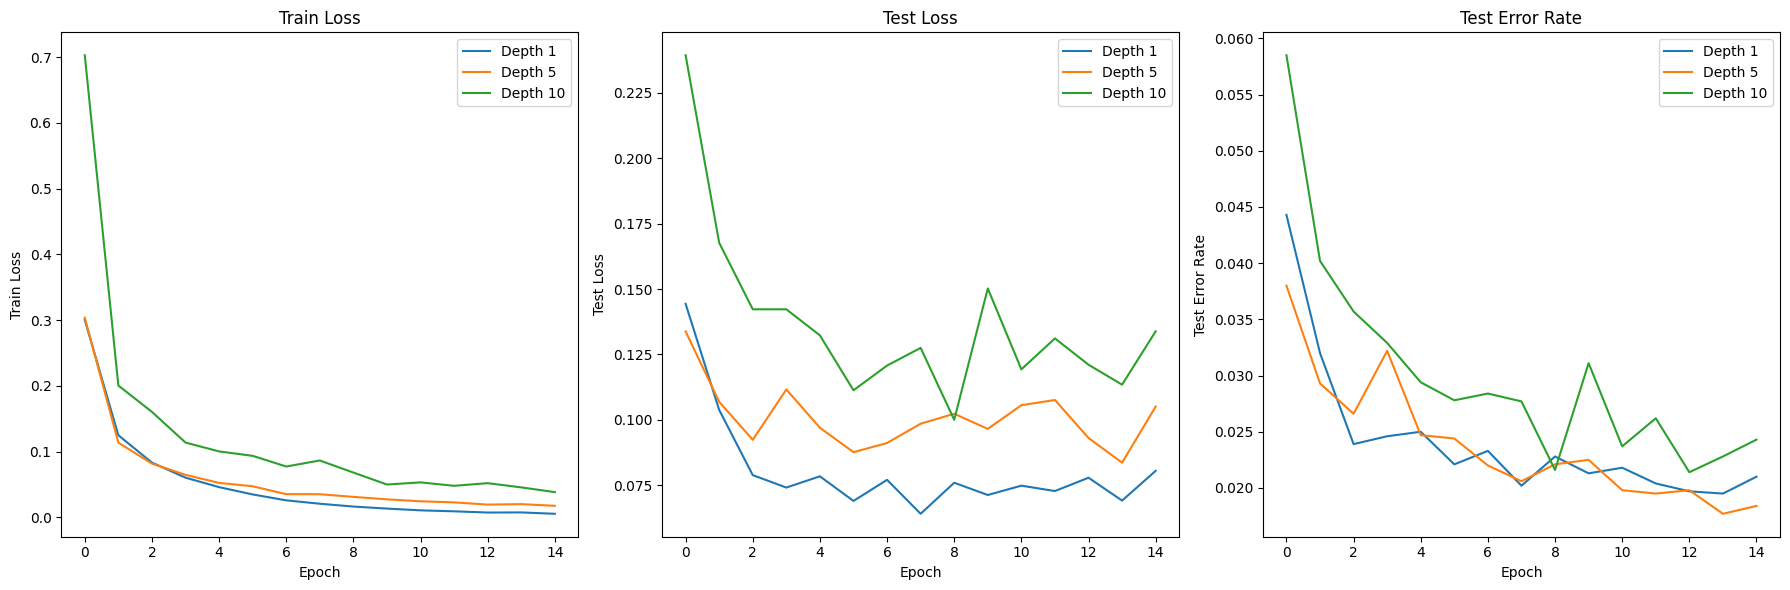

In [572]:
import matplotlib.pyplot as plt
#depths to test
depths = [1, 5, 10]

#initialise data stores
results_list = []
all_train_losses = {}
all_test_losses = {}
all_test_errors = {}

#experiments for each depth
for depth in depths:
    train_losses, test_losses, test_errors = run_experiment(depth=depth, num_epochs=15)
    
    #collect results
    results_list.append({
        'Depth': depth,
        'Train Loss': train_losses[-1],
        'Test Loss': test_losses[-1],
        'Test Error Rate': test_errors[-1]
    })

    #collect the full lists for plotting
    all_train_losses[depth] = train_losses
    all_test_losses[depth] = test_losses
    all_test_errors[depth] = test_errors

#create dataframe
depth_results_df = pd.DataFrame(results_list)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

metrics = ['Train Loss', 'Test Loss', 'Test Error Rate']
all_metrics = [all_train_losses, all_test_losses, all_test_errors]

for i, metric in enumerate(metrics):
    for depth in depths:
        axes[i].plot(all_metrics[i][depth], label=f'Depth {depth}')
    axes[i].set_title(metric)
    axes[i].set_xlabel('Epoch')
    axes[i].set_ylabel(metric)
    axes[i].legend()

plt.tight_layout()
plt.show()



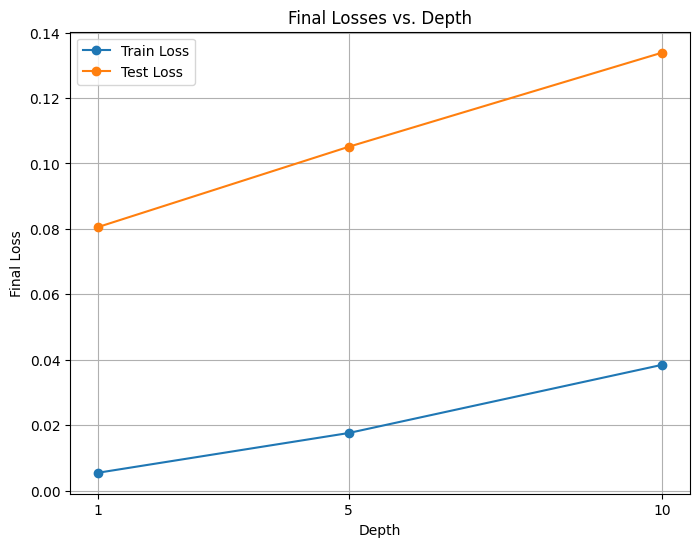

In [573]:
plt.figure(figsize=(8, 6))
plt.plot(depths, depth_results_df['Train Loss'], marker='o', linestyle='-', label='Train Loss')
plt.plot(depths, depth_results_df['Test Loss'], marker='o', linestyle='-', label='Test Loss')
plt.title('Final Losses vs. Depth')
plt.xlabel('Depth')
plt.ylabel('Final Loss')
plt.xticks(depths)
plt.legend()
plt.grid(True)
plt.show()

In [256]:
print(depth_results_df)

   Depth  Train Loss  Test Loss  Test Error Rate
0      1    0.012689   0.076773           0.0202
1      5    0.026470   0.102232           0.0220
2     10    0.073934   0.111160           0.0246


These are the final results for the performance of width 256 networks with varying depths, after 15 epochs the train loss has clearly converged for each layer as they have become flat, the depths 1 and 5 converge near to zero, whereas depth 10 converges much higher likely due to the fact it has a more complex loss landscape.
It is easily seen that out of 1, 5, and 10, the depth that had the lowest test error was 1, which shows that it was able to generalise nicely without overfitting to the dataset.
Depth 5 train losses converged at a similar rate, however did not generalise well in comparison to 1. 
Depth 10 also generalised poorly. Clearly to ensure our model does not overfit, generalises well and maintains a low error rate we should use depth 1.

Below I will analyse the width of a function for a fixed depth of 1, 15 epochs, optimizer Adam with learning rate of 0.001 and batch size of 64:

Epoch: 000 | Train Loss: 1.4244 | Test Loss: 0.9321 | Test Error: 0.3235
Epoch: 001 | Train Loss: 0.8334 | Test Loss: 0.7411 | Test Error: 0.2166
Epoch: 002 | Train Loss: 0.7156 | Test Loss: 0.6644 | Test Error: 0.1895
Epoch: 003 | Train Loss: 0.6592 | Test Loss: 0.6249 | Test Error: 0.1760
Epoch: 004 | Train Loss: 0.6272 | Test Loss: 0.6005 | Test Error: 0.1652
Epoch: 005 | Train Loss: 0.6057 | Test Loss: 0.5823 | Test Error: 0.1603
Epoch: 006 | Train Loss: 0.5895 | Test Loss: 0.5713 | Test Error: 0.1597
Epoch: 007 | Train Loss: 0.5771 | Test Loss: 0.5603 | Test Error: 0.1582
Epoch: 008 | Train Loss: 0.5671 | Test Loss: 0.5492 | Test Error: 0.1542
Epoch: 009 | Train Loss: 0.5581 | Test Loss: 0.5448 | Test Error: 0.1524
Epoch: 010 | Train Loss: 0.5511 | Test Loss: 0.5384 | Test Error: 0.1527
Epoch: 011 | Train Loss: 0.5448 | Test Loss: 0.5317 | Test Error: 0.1483
Epoch: 012 | Train Loss: 0.5394 | Test Loss: 0.5290 | Test Error: 0.1467
Epoch: 013 | Train Loss: 0.5348 | Test Loss: 0.5250

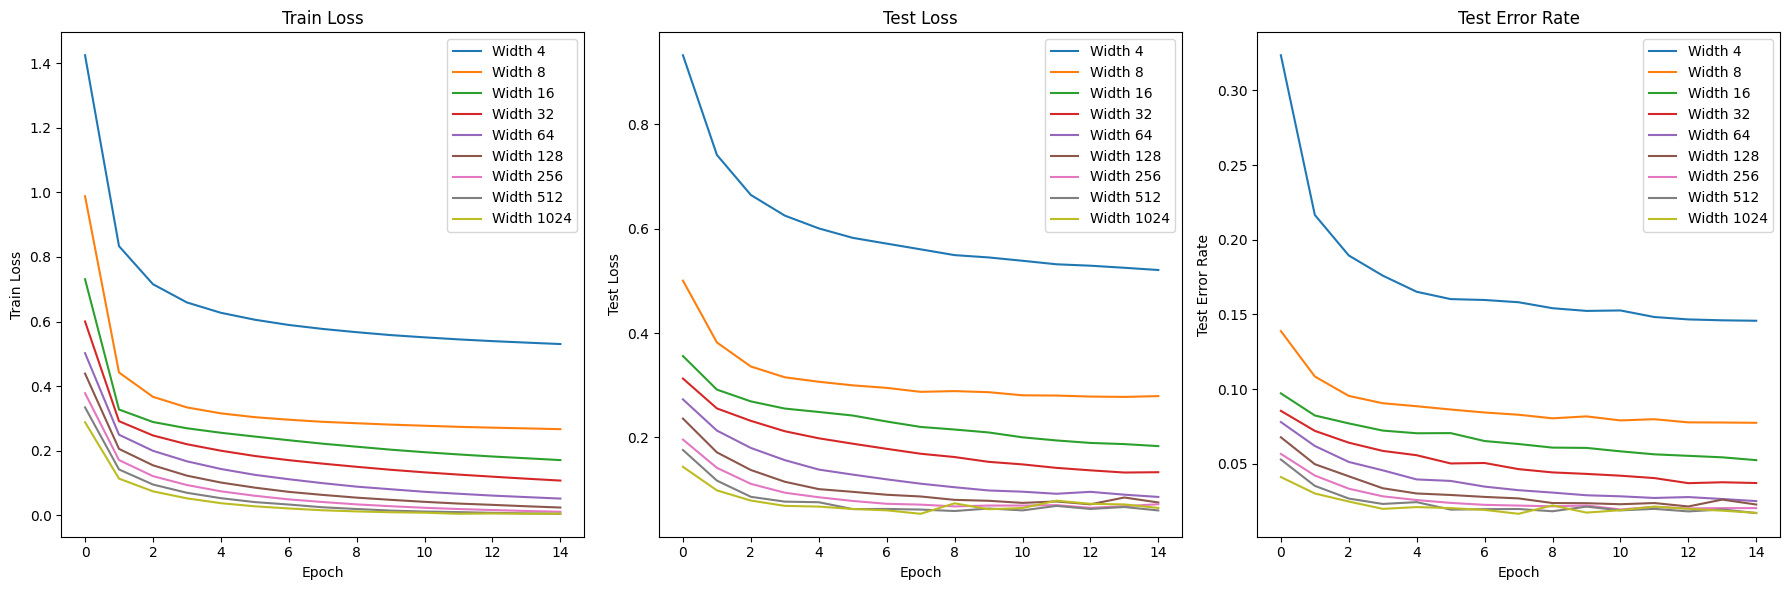

In [266]:
widths = [4,8,16,32,64,128,256,512,1024]

# Initialize a list to collect data
results_list = []
all_train_losses = {}
all_test_losses = {}
all_test_errors = {}

#experiments for each width
for width in widths:
    train_losses, test_losses, test_errors = run_experiment(width=width, num_epochs=15)
    
    #collect results
    results_list.append({
        'Width': width,
        'Train Loss': train_losses[-1],
        'Test Loss': test_losses[-1],
        'Test Error Rate': test_errors[-1]
    })

    #collect full lists (plots)
    all_train_losses[width] = train_losses
    all_test_losses[width] = test_losses
    all_test_errors[width] = test_errors

#convert to dataframe
width_results_df = pd.DataFrame(results_list)

# Initialize figures for the three plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

metrics = ['Train Loss', 'Test Loss', 'Test Error Rate']
all_metrics = [all_train_losses, all_test_losses, all_test_errors]

#plotting
for i, metric in enumerate(metrics):
    for width in widths:
        axes[i].plot(all_metrics[i][width], label=f'Width {width}')
    axes[i].set_title(metric)
    axes[i].set_xlabel('Epoch')
    axes[i].set_ylabel(metric)
    axes[i].legend()

plt.tight_layout()
plt.show()


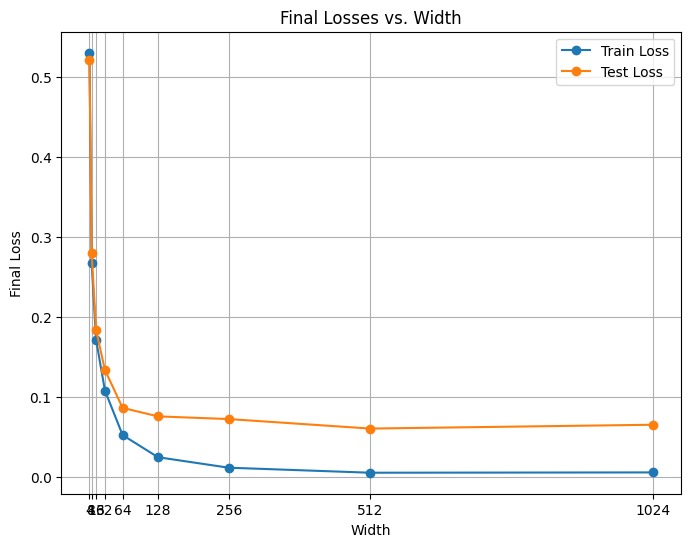

In [267]:
#plot final losses against width
plt.figure(figsize=(8, 6))
plt.plot(widths, width_results_df['Train Loss'], marker='o', linestyle='-', label='Train Loss')
plt.plot(widths, width_results_df['Test Loss'], marker='o', linestyle='-', label='Test Loss')
plt.title('Final Losses vs. Width')
plt.xlabel('Width')
plt.ylabel('Final Loss')
plt.xticks(widths)
plt.legend()
plt.grid(True)
plt.show()

In [262]:
print(width_results_df)

   Width  Train Loss  Test Loss  Test Error Rate
0      4    0.459742   0.456920           0.1329
1      8    0.265844   0.273535           0.0766
2     16    0.163851   0.177429           0.0536
3     32    0.093246   0.116441           0.0331
4     64    0.049434   0.091435           0.0267
5    128    0.025261   0.082124           0.0226
6    256    0.014084   0.069348           0.0197
7    512    0.009931   0.066110           0.0192
8   1024    0.010481   0.090588           0.0225


As the widths increase the performance of the model converges at about width 128. The final test and train losses deviate at this layer giving an error rate of approximately 0.02 for widths greater than 128. The optimal choice is therefore between width 128 and 256, as these widths have both minimal error rate and test loss. 
The error rate does not increase with width, implying increasing width does not cause the model to overfit or generalise worse.
At very low widths the model generally performs very poorly, with very high train and test losse. 
Therefore we should choose the simplest such best performing model, as if it is just as accurate as a wider model (within some arbitrary degree of accuracy) then it is more likely to be correct by Occam's Razor.

***
***

## Part 4: The link between Neural Networks and Gaussian Processes [8 points]

### Part 4.1: Proving the relationship between a Gaussian process and a neural network [4 points]

### Task 1: Proper weight scaling

In a fully connected network the number of inputs to a particular node scales with the number of nodes per layer, when scaling the variance for a weight dividing by the number of nodes in the last layer prevents the variance from blowing up as the number of nodes becomes large, essentially taking an average. This scaling is sutiable for the task at hand because we want to apply the central limit theorem to each layer. For N weights following a mean zero and variance $\sigma$ normal distribution, the central limit theorem states that the sum of these variables tends towards $\mathcal{N}(0, N\sigma)$. Clearly scaling sigma by $\frac{1}{N}$ ensures the variance does not tend towards infinity.

### Task 2: Derive the GP relation for a single hidden layer

The output layer is given by:

$f_i^{(2)}(x) = \sum_{j=1}^{N_1} w_{ij}^{(2)} g_j^{(1)}(x) + b_i^{(2)}$

where

$w_{ij}^{(l)} \sim \mathcal{N}(0, C_w^{(l)}) \quad \text{i.i.d.}$, where $C_w^{(l)} = \frac{\sigma_w^{(l)}}{N_{l-1}} \quad \text{for } l \geq 2, $ and $b_i^{(l)} \sim \mathcal{N}(0, \sigma_b^{(l)}) \quad \text{i.i.d.}$
 and $g_j^{(1)}(x)$ is the output of the previous layer passed through an activation function. Since the samples are iid and the output is a linear combination of samples passed through the same activation function each $g_j$ is iid.

 This implies each random variable $w_{ij}^{(2)} g_j^{(1)}(x) + b_i^{(2)}$ is also iid over j. By the central limit theorem as $N_1$ becomes very large this is the limit sum of iid random variables. Hence 

 $\sum_{j=1}^{N_1} w_{ij}^{(2)} g_j^{(1)}(x) + b_i^{(2)} \sim \mathcal{N}(\mu _1, K_1)$ where $\mu _1$ and $K_1$ are calculated as follows:

 The means of the weights and biases are 0, hence $E[w_{ij}^{(2)} g_j^{(1)}(x) + b_i^{(2)}] = 0$ by linearity of the expectation, since w and g are independent and $E[w_{ij}^{(2)}] = 0, E[b_i^{(2)}] = 0$. Therefore $\mu _1 = 0$

 Using this we can show $K_1(x,x') = E[(\sum_{j=1}^{N_1} w_{ij}^{(2)} g_j^{(1)}(x) + b_i^{(2)})(\sum_{j=1}^{N_1} w_{ij}^{(2)} g_j^{(1)}(x') + b_i^{(2)})] = \sum_{j=1}^{N_1} E[(w_{ij}^{(2)})^2 g_j^{(1)}(x) g_j^{(1)}(x') + (b_i^{(2)})^2]$ due to the independence and zero expectation of $w_{ij}$, $w_{ij'}$ and $b_i$.

 Simplifying we obtain $\sum_{j=1}^{N_1} \frac{\sigma _w^{(2)}}{N_1} E[g_j^{(1)}(x) g_j^{(1)}(x')] + \sigma _b^{(2)}$ = $\sigma _w^{(2)} E[g_j^{(1)}(x) g_j^{(1)}(x')] + \sigma _b^{(2)}$ since $g_j$'s are iid, where we have computed the sum and cancelled out the $N_1$ term. Using $g_i^{(1)}(x) = \phi\left(f_i^{(1)}(x)\right)$ we see that this is of the required form:

 $K_1(x,x') = \sigma _w^{(2)} E[\phi (f_i^{(1)}(x)) \phi (f_i^{(1)}(x'))] + \sigma _b^{(2)}$

### Task 3: Why in succession

When recursively taking the width of the layers to infinity we must ensure that the input to a layer is already a Gaussian Process, this is because we show that layer l is a GP using the fact layer l-1 is a GP. Since it is an inductive argument we should take limits successively.

### Task 4: Derive the GP relation for multiple hidden layers

In this proof we assume $f_i^{l-1}$ is already governed by a gaussian process, hence we can write $f_i^{l-1} \sim \mathcal{N}(\mu ^{l-1},K^{l-1})$, we also know that the $f_i^{l-1}$ are iid and the $g_i^{l-1}$ are iid.

The bulk of the proof follows the same steps as the proof for a single hidden layer.

$f_i^l$ is defined as $f_i^{(l)}(x) = \sum_{j=1}^{N_{l-1}} w_{ij}^{(l)} g_j^{(l-1)}(x) + b_i^{(l)}$ where the weights, biases and g are defined as before.

Clearly since the weights, biases are normally distributed and iid, and the g's for a layer are iid as given in the question, $w_{ij}^{(l)} g_j^{(l-1)}(x) + b_i^{(l)}$ follows a unique distribution, independent of j. In addition to this, each $g_i^{l-1}$ is independent making each term in the sum iid. By assumtion the output of the previous layer is a GP, hence has finite variance.

Since $w_{ij}^{(l)} g_j^{(l-1)}(x) + b_i^{(l)}$ is iid over j we can apply the central limit theorem to calculate the distribution of $f_i^l$ for large $N_{l-1}$:

The mean:

$$\mu^{(l)} = \mathbb{E}[f^{(l)}] = \mathbb{E}\left[\sum_{i=1}^{N_l} w_{ij}^{(l)} g^{(l-1)}(x) + b_j^{(l)}\right] = \sum_{i=1}^{N_l} \mathbb{E}[w_{ij}^{(l)}] \mu^{(l-1)} + \mathbb{E}[b_j^{(l)}] = 0$$

Since $\mathbb{E}[w_{ij}^{(l)}]=0$ and $\mathbb{E}[b_j^{(l)}]=0$ and using independence of w and g.

The covariance:

$$K^{(l)}(x,x') = \mathbb{E}[f^{(l)}(x) f^{(l)}(x')] - 0 = \mathbb{E}\left[\sum_{i=1}^{N_l} w_{ij}^{(l)} g^{(l-1)}(x) + b_j^{(l)}\right]\left[\sum_{k=1}^{N_l} w_{kj}^{(l)} g^{(l-1)}(x') + b_j^{(l)}\right]$$

By linearity of the expectation, and independence of the weights, biases and the previous layer's outputs we can expand and simplify for:

$$K^{(l)}(x,x') = \sum_{j=1}^{N_l} \frac{\sigma _w^{(l)}}{N_{l-1}} E[g_j^{(l-1)}(x) g_j^{(l-1)}(x')] + \sigma _b^{(l)} = \sigma _w^{(l)} E[\phi (f_i^{(l-1)}(x)) \phi (f_i^{(l-1)}(x'))] + \sigma _b^{(l)}$$

Where $f_i^{(l-1)} \sim \mathcal{N}(\mu ^{l-1},K^{l-1})$ hence this is a recursive relationship for K with $K^0 = \sigma _w^{(0)} x^Tx' + \sigma _b^{(0)}$ and $\mu^0=0$.

In conclusion we have shown that if the previous layer is governed by a GP then the current layer is a mean zero GP. Since the first layer is a mean zero GP we have shown that each layer is governed by a mean zero GP



***

### Part 4.2: Analysing the performance of the Gaussian process and a neural network [4 points]

In [678]:
# Please use float64 as default dtype for this part of the assignment
torch.set_default_dtype(torch.float64)

# Another hint: when  computing [ K^L(X,X) + noise^2 Id ]^-1 y and  [ K^L(X,X) + noise^2 Id ]^-1 K^L(X,X*)
# You can TRY cholesky solve as it should be p.d. (except case for numerical errors) - maybe you can use try:/except:
# You can also try to enforce symmetry in posterior covariance by doing (K + K.t())/2

In [679]:
# You can of course add more cells of both code and markdown.

In [680]:
import random 
def filter_by_class(dataset, classes):
    """
    Filter a PyTorch dataset to include only specified classes
    Parameters:
    - dataset (torch.utils.data.Dataset): PyTorch dataset to filter
    - classes (list): List of class labels to include
    Returns:
    - filtered_dataset (torch.utils.data.Subset): Subset of the input dataset containing only the specified classes
    """
    #converts the classes to indices
    class_to_idx = {class_name: i for i, class_name in enumerate(dataset.classes)}
    class_indices = [class_to_idx.get(c, c) for c in classes]

    filtered_indices = [i for i, (_, target) in enumerate(dataset) if target in class_indices]
    #shuffles indices
    random.shuffle(filtered_indices)
    return torch.utils.data.Subset(dataset, filtered_indices[:1000])

def relabel_dataset(dataset):
    """
    Relabel the dataset targets based on specified class labels.

    Parameters:
    - dataset (torch.utils.data.Dataset): PyTorch dataset to relabel.
    """
    for i in range(len(dataset)):
        _, label = dataset[i]
        new_label = -0.5 if label == classes[0] else 0.5
        dataset.dataset.targets[dataset.indices[i]] = new_label

classes = [3,4] # cats and deer
train_set_filtered = filter_by_class(train_set_cifar, classes)
test_set_filtered = filter_by_class(test_set_cifar, classes)

relabel_dataset(train_set_filtered)
relabel_dataset(test_set_filtered)


print(len(train_set_filtered), len(test_set_filtered))

1000 1000


In [688]:
#check labels, number of images in datasets, and initialise the dataloader with batch 1000 (all datapoints at once)
print(f'images in train set:{len(train_set_filtered.indices)}', f'images in test set:{len(test_set_filtered)}', train_set_filtered.dataset[1][1])

train_set_dataloader, test_set_dataloader = loading_data(1000, train_set_filtered, test_set_filtered)

for j in range(10):
    print(train_set_dataloader.dataset[j][1])


images in train set:1000 images in test set:1000 9
0.5
0.5
-0.5
0.5
-0.5
-0.5
0.5
0.5
-0.5
-0.5


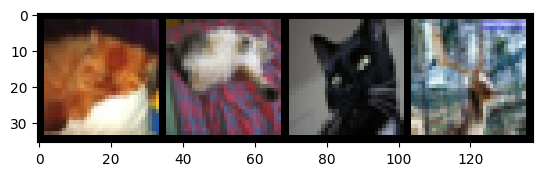

In [732]:
#check the image classes are as expected
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

def show_images(dataset, num_images=4):
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=num_images, shuffle=True)
    images, labels = next(iter(dataloader))
    imshow(torchvision.utils.make_grid(images))

show_images(train_set_filtered, num_images=4)

# Formulating classification as a regression problem using Gaussian Processes:
By assigning the labels to our two classes as 0.5 and -0.5, then we can train a GP regression to predict these labels by taking features as inputs. Once the model is trained we can simply classify by taking the nearest label, for example if the predicted label is -0.3 we will classify this prediction as a -0.5 since this is closer. This enables us to classify by taking predicted labels above zero to be a prediction of 0.5, and -0.5 for predicted labels below zero.

# Task 1

In [683]:
def gp_kernel(L, var_w, var_b, X1, X2):
    """
    Compute the Gaussian Process kernel
    Parameters:
        L (int): The number of layers.
        var_w (float): The variance of the weights.
        var_b (float): The variance of the biases.
        X1 (torch.Tensor): Input data matrix of shape (N1, D)
        X2 (torch.Tensor): Input data matrix of shape (N2, D)
    Returns:
        torch.Tensor: The GP kernel matrix of shape (N1, N2)
    """
    N0 = X1[0].flatten().shape[0]

    #initialise K0
    def k0(x,y):
        return var_b + var_w * (torch.mm(x,y.T)/N0)
    
    def next_layer(K, K1, K2):
        """
        Compute the kernel for the next layer
        Parameters:
            K (torch.Tensor): Current kernel matrix.
            K1 (torch.Tensor): Kernel matrix of data set 1
            K2 (torch.Tensor): Kernel matrix of data set 2
        Returns:
            torch.Tensor: Kernel matrix for the next layer
            torch.Tensor: Kernel matrix K1 for the next layer
            torch.Tensor: Kernel matrix K2 for the next layer

        """
        #iterative step calculation
        norms = torch.sqrt(torch.outer(torch.diag(K1), torch.diag(K2))) #store norms
        cos_theta = K / norms
        theta = torch.acos(cos_theta.clamp(-1, 1)) #clamp to ensure no NaN values
        sin_theta = torch.sin(theta)
        K_next = var_b + var_w * norms * ((sin_theta + (np.pi - theta) * torch.cos(theta)) / (2 * np.pi)) #calculate next K
        return K_next, var_b + var_w/2 * torch.outer(torch.diag(K1), (torch.diag(K1))), var_b + var_w/2 * torch.outer(torch.diag(K2), torch.diag(K2)) #return all Ks needed for next iteration
    #prepare loop:
    K = k0(X1,X2)
    K1 = k0(X1,X1)
    K2 = k0(X2,X2)
    for i in range(1, L+1): #perform iteration over L layers
        K, K1, K2 = next_layer(K,K1,K2)
    return K #return gp kernel

    

In [684]:
def gp_posterior(X_train, y_train, X_test, sigma, var_w, var_b, L):
    """
    Compute the posterior mean and covariance of a Gaussian Process
    Parameters:
        X_train (torch.Tensor): Training input data matrix of shape (N_train, D)
        y_train (torch.Tensor): Training target data vector of shape (N_train,)
        X_test (torch.Tensor): Test input data matrix of shape (N_test, D)
        sigma (float): Observation noise standard deviation
        var_w (float): Variance of the weights
        var_b (float): Variance of the biases
        L (int): The number of layers
    Returns:
        torch.Tensor: Posterior mean vector of shape (N_test,)
        torch.Tensor: Posterior covariance matrix of shape (N_test, N_test)
    """
    #compute kernel matrices
    K_xx = gp_kernel(L, var_w, var_b, X_train, X_train)
    K_xstar_x = gp_kernel(L, var_w, var_b, X_test, X_train)
    K_xstar_xstar = gp_kernel(L, var_w, var_b, X_test, X_test)

    #add noise to the training kernel
    K_xx_noise = K_xx + sigma**2 * torch.eye(K_xx.size(0))

    #compute the inverse of K_xx_noise
    K_xx_noise_inv = torch.linalg.inv(K_xx_noise)

    #compute the posterior mean
    posterior_mean = torch.matmul(torch.matmul(K_xstar_x, K_xx_noise_inv), y_train)

    #posterior covariance
    posterior_cov = K_xstar_xstar - torch.matmul(torch.matmul(K_xstar_x, K_xx_noise_inv), K_xstar_x.T)

    return posterior_mean, posterior_cov


# Analysis of the performance for varying hyperparameters:

I will be testing verying numbers of layers from 1 to 10 to find which provides the best accuracy. 
For each layer I will be testing a grid of values for the variance of the weights and biases to find the optimal variances for each layer. After this I will compare the optimal accuracies over the layers to determine which hyperparameters are best. In this test I fix the noise to be 0.1.

I will standardise the train and test images beforehand.

In [713]:
#define hyperparameter ranges
var_b_values = torch.linspace(0.0, 1.0, 8)
var_w_values = torch.linspace(0.0, 1.0, 8)
sigma = 0.1

#initialise results list
results = []
best_accuracies_per_layer = []
# set train and test datasets
for x, y in test_set_dataloader:
    X_test, y_test = x, y

for x, y in train_set_dataloader:
    X_train, y_train = x, y
#flatten datasets for the gp function
X_train_flat = X_train.view(X_train.size(0), -1)
X_test_flat = X_test.view(X_test.size(0), -1)
#calculate mean and std for standardisation
mean_train = torch.mean(X_train_flat, dim=0)
std_train = torch.std(X_train_flat, dim=0)

mean_test = torch.mean(X_test_flat, dim=0)
std_test = torch.std(X_test_flat, dim=0)
#standardise the images
X_train_normalised = (X_train_flat - mean_train)/std_train
X_test_normalised = (X_test_flat-mean_train)/std_train


for L in range(1, 11):  #analyze depths from 1 to 10
    best_accuracy = 0  #initialize accuracy for this depth
    best_params = None  #initialize best parameters
    
    for var_b in var_b_values:
        for var_w in var_w_values:
            accuracies = []  #collect accuracies for this configuration

            #flatten the images
            #X_train = X_train.view(X_train.size(0), -1)
            #X_test = X_test.view(X_test.size(0), -1)
            
            #compute the posterior mean and predictions
            posterior_mean, _ = gp_posterior(X_train_normalised, y_train, X_test_normalised, sigma, var_w, var_b, L)
            predictions = torch.sign(posterior_mean)
            
            #calculate accuracy
            accuracy = (predictions.squeeze() == torch.sign(y_test)).float().mean().item()
            accuracies.append(accuracy)
            #check if this is the best accuracy for the current layer
            if max(accuracies) > best_accuracy:
                best_accuracy = max(accuracies)
                best_params = {'L': L, 'var_b': var_b.item(), 'var_w': var_w.item(), 'Best_Accuracy': best_accuracy}
                best_inputs = {'L': L, 'var_b': var_b.item(), 'var_w': var_w.item()}
    
    #store accuracy
    best_accuracies_per_layer.append(best_params)

#convert to dataframe
import pandas as pd

df_best_accuracies = pd.DataFrame(best_accuracies_per_layer)


In [714]:
#display the DataFrame for a quick overview
print(df_best_accuracies)


    L     var_b     var_w  Best_Accuracy
0   1  0.142857  0.285714          0.743
1   2  1.000000  0.428571          0.747
2   3  0.714286  0.714286          0.748
3   4  0.714286  1.000000          0.754
4   5  0.714286  1.000000          0.752
5   6  0.571429  1.000000          0.733
6   7  0.571429  0.857143          0.694
7   8  0.571429  0.857143          0.678
8   9  1.000000  0.428571          0.660
9  10  0.857143  0.857143          0.650


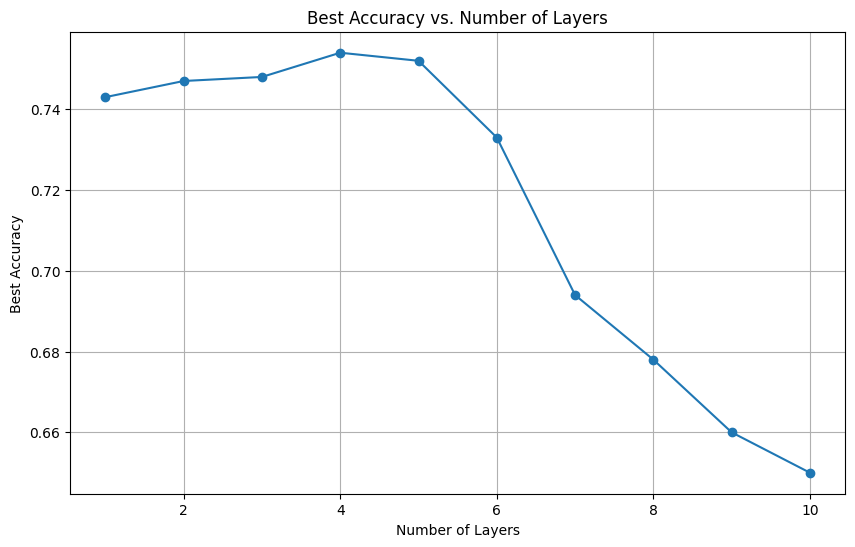

In [715]:
plt.figure(figsize=(10, 6))
plt.plot(df_best_accuracies['L'], df_best_accuracies['Best_Accuracy'], marker='o')
plt.title('Best Accuracy vs. Number of Layers')
plt.xlabel('Number of Layers')
plt.ylabel('Best Accuracy')
plt.grid(True)
plt.show()

In [716]:
#choose best inputs to be layer 1, as explained below
best_inputs = df_best_accuracies[df_best_accuracies['L'] == 1][['L','var_b', 'var_w']]
best_inputs = best_inputs.to_dict(orient='records')[0]
best_inputs

{'L': 1, 'var_b': 0.14285714285714285, 'var_w': 0.2857142857142857}

In the table above we have the optimal variances for each depth over a gridspace. As the depth increases from 1 to 5 we see very small change in accuracy, generally they all perform similarly, however as the number of layers increases further the accuracy drops very quickly, suggesting that more layers may lead to overfitting. 
There seems to be no noticable pattern in the selection of the variances, suggesting the overall accuracy is primarily sensitive on the number of layers. In conclusion the exact optimal variances depend on the number of layers.
Since the simplest model that achieves the best accuracy is the 1 layer model we should choose this one by Occam's Razor, as this is most likely to be correct.

The cell below simply prints a random selection of test images, this is just to observe what the model may be getting right or wrong.

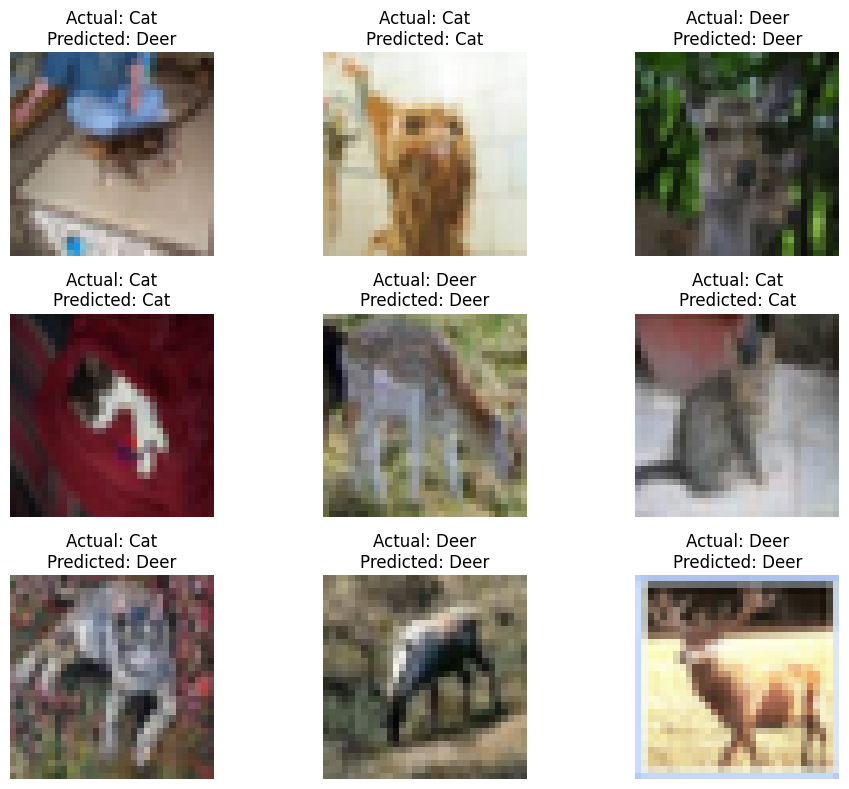

In [728]:
import matplotlib.pyplot as plt
import numpy as np

#compute the posterior mean and predictions
posterior_mean, _ = gp_posterior(X_train_normalised, y_train, X_test_normalised, sigma,**best_inputs)
predictions = torch.sign(posterior_mean)

#calculate accuracy
accuracy = (predictions.squeeze() == torch.sign(y_test)).float().mean().item()


def plot_test_images_with_labels(X_test, y_test, predictions):
    """
    Plots random test images with labels
    """
    plt.figure(figsize=(10, 8))
    indices = torch.randperm(1000)[:9].tolist()
    for i in range(9):  # Plot first 9 images
        plt.subplot(3, 3, i+1)
        img = X_test[indices[i]].permute(1,2,0)#.view(3, 32, 32)#.detach().cpu().numpy()  # Adjust shape & convert to numpy
        plt.imshow(img)
        plt.title(f"Actual: {'Cat' if y_test[indices[i]] == -0.5 else 'Deer'}\nPredicted: {'Cat' if predictions[indices[i]] == -1 else 'Deer'}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()


plot_test_images_with_labels(X_test, y_test, predictions)


# Analyse the uncertainty:

To analyse the two least and most uncertain predictions I will take the two largest and two smallest values on the diagonal of the covariance matrix:

In [718]:
post_mean, post_cov = gp_posterior(X_train_normalised, y_train, X_test_normalised, sigma, **best_inputs)

In [719]:
#Check positive variances, a good model should have accurate variances that should not be negative, good means will be not too close to zero with respect to +-0.5
print(torch.all(torch.diag(post_cov) > 0))
print(post_mean)

tensor(True)
tensor([ 3.2695e-01,  3.6222e-01, -6.1769e-01, -1.2251e-01, -1.5880e-01,
         3.6873e-01, -3.3359e-01,  2.5864e-01,  2.9809e-01, -1.6974e-01,
        -1.1181e-01, -1.6326e-01, -5.8963e-03, -3.6679e-02,  1.6069e-01,
         3.9853e-02, -1.3226e-01,  3.5147e-01, -4.2966e-01, -4.0602e-01,
        -2.6693e-01, -4.8914e-01, -8.2422e-02,  1.0585e-01,  5.5451e-01,
        -2.3516e-02,  2.2833e-01, -1.8368e-01,  2.8171e-01,  2.1067e-01,
         3.0377e-01, -9.1254e-02,  2.8882e-01, -1.3514e-02,  9.1727e-02,
        -2.4250e-01,  2.1608e-01,  6.7008e-01, -1.4294e-01,  3.1213e-01,
         9.3085e-03, -2.2570e-01, -8.3398e-02,  3.8148e-01,  2.6645e-01,
        -2.0783e-01, -5.6055e-01,  4.0216e-01, -5.9303e-01,  4.0944e-01,
        -3.0335e-01,  1.1958e-01,  1.0367e-01,  2.2245e-01, -6.4618e-01,
        -5.9826e-01,  1.8230e-01,  6.7939e-02,  1.1125e-01,  1.8783e-01,
         4.5064e-02,  2.7616e-02,  2.3720e-01,  2.3750e-01, -2.4637e-01,
         4.9979e-01, -2.8779e-01,  3.9

In [720]:
#Sort variances
ind_list_asc = list(torch.argsort(torch.abs(post_cov.diag())))
#Predictions for labeling
predictions = torch.sign(post_mean)

def plot_highest_and_lowest_variance(X_test, y_test, predictions):
    """
    Plot the test samples with the highest and lowest variance (uncertainty) based on the posterior covariance matrix.

    Parameters:
        X_test (torch.Tensor): Test input data tensor of shape (N_test, C, H, W)
        y_test (torch.Tensor): Test target data tensor of shape (N_test,)
        predictions (torch.Tensor): Predicted labels tensor of shape (N_test,)
        post_cov (torch.Tensor): Posterior covariance matrix of shape (N_test, N_test)
    """
    plt.figure(figsize=(10, 8))
    indices = ind_list_asc[:2]+ind_list_asc[-2:]
    print(indices)
    for i in range(4):  # Plot 4 images
        plt.subplot(2, 2, i+1)
        img = X_test[indices[i]].permute(1,2,0)#.view(3, 32, 32)#.detach().cpu().numpy()  # Adjust shape & convert to numpy
        plt.imshow(img)
        plt.title(f"Actual: {'Cat' if y_test[indices[i]] == -0.5 else 'Deer'}\nPredicted: {'Cat' if predictions[indices[i]] == -1 else 'Deer'}\nVariance: {post_cov.diag()[indices[i]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()


[tensor(106), tensor(895), tensor(661), tensor(526)]


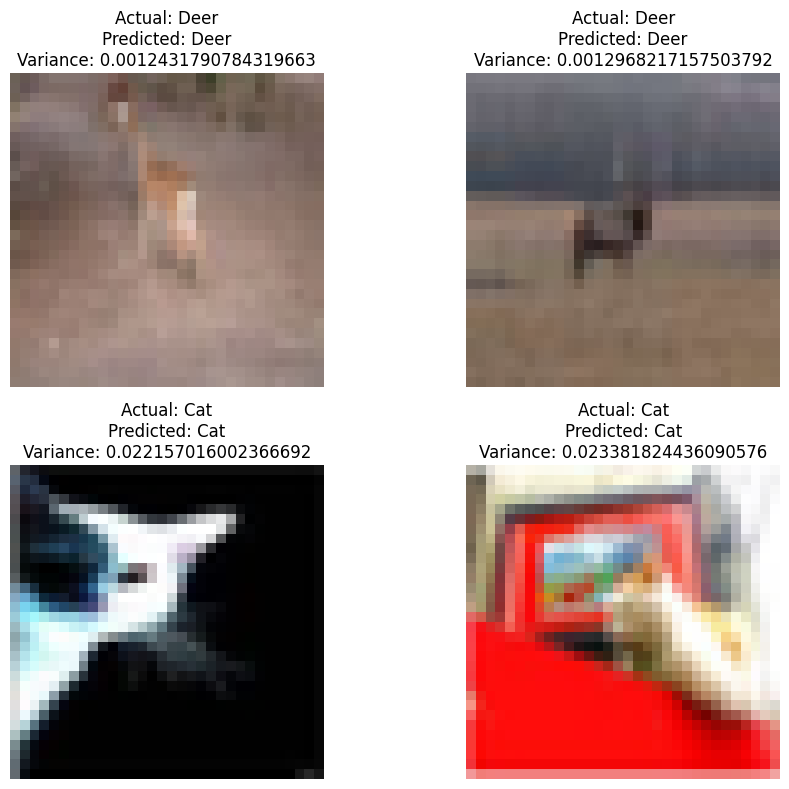

In [721]:
plot_highest_and_lowest_variance(X_test, y_test, predictions)

Printed above are the two highest and two lowest variance images in the test set. The lower the variance the smaller the confidence interval for the label the computer has made, so if the label is close to the true label it has a very high probability of being right. The high variance images above are clearly somewhat unique: unique colour backgrounds, or close ups/ partially showing the animals face, so it makes sense that the model will be less certain of these images. On the other hand the low variance images of the deer seem very textbook: taken in nature, whole deer in view, so again it makes sense that the model will be more familiar with the features and more certain with these images.

Below I am showing the pairs of images most and least correlated, this is to help understand how the model defines similar and opposite images. To do this I have taken the smallest absolute covariance and largest absolute covariance between two unique images (ignoring the diagonal), and printed the corresponding images.

In [726]:
def plot_similar(X_test, y_test, post_cov):
    """
    Plot similar images with the corresponding covariances.
    Parameters:
        X_test (torch.Tensor): Test input data tensor of shape (N_test, C, H, W)
        y_test (torch.Tensor): Test target data tensor of shape (N_test,)
        post_cov (torch.Tensor): Posterior covariance matrix of shape (N_test, N_test)
    Returns:
        None
    """
    
    post_cov = torch.abs(post_cov)
    
    #ignore diagonal for maximum

    for i in range(post_cov.size(0)):
        post_cov[i,i] = -float('inf')

    max_val = torch.max(post_cov)
    print(max_val)

    max_index = (post_cov == max_val).to(dtype=torch.float64).nonzero()[0]
    #ignore diagonal for minimum
    for i in range(post_cov.size(0)):
        post_cov[i,i] = float('inf')
    min_val = torch.min(post_cov)
    min_index = (post_cov == min_val).to(dtype=torch.float64).nonzero()[0]

    print(min_val)

    indices = list(min_index) + list(max_index)
    print(indices, max_index)


    max_samples = [X_test[indices[0]], X_test[indices[1]]]
    min_samples = [X_test[indices[2]], X_test[indices[3]]]

    plt.figure(figsize=(12, 6))

    #plot the first two images with their corresponding covariances
    plt.subplot(2, 2, 1)
    plt.imshow(max_samples[0].permute(1, 2, 0))
    plt.title(f"Actual: {'Cat' if y_test[indices[0]] == -0.5 else 'Deer'}\nPredicted: {'Cat' if predictions[indices[0]] == -1 else 'Deer'}\nLowest Covariance: {post_cov[indices[0], indices[1]]}")
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(max_samples[1].permute(1, 2, 0))
    plt.title(f"Actual: {'Cat' if y_test[indices[1]] == -0.5 else 'Deer'}\nPredicted: {'Cat' if predictions[indices[1]] == -1 else 'Deer'}\nLowest Covariance: {post_cov[indices[0], indices[1]]}")
    plt.axis('off')

    #plot the last two images with their corresponding covariances
    plt.subplot(2, 2, 3)
    plt.imshow(min_samples[0].permute(1, 2, 0))
    plt.title(f"Actual: {'Cat' if y_test[indices[2]] == -0.5 else 'Deer'}\nPredicted: {'Cat' if predictions[indices[2]] == -1 else 'Deer'}\nHighest Covariance: {post_cov[indices[2], indices[3]]}")
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.imshow(min_samples[1].permute(1, 2, 0))
    plt.title(f"Actual: {'Cat' if y_test[indices[3]] == -0.5 else 'Deer'}\nPredicted: {'Cat' if predictions[indices[3]] == -1 else 'Deer'}\nHighest Covariance: {post_cov[indices[2], indices[3]]}")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

tensor(0.0065)
tensor(7.5617e-13)
[tensor(34), tensor(228), tensor(173), tensor(202)] tensor([173, 202])


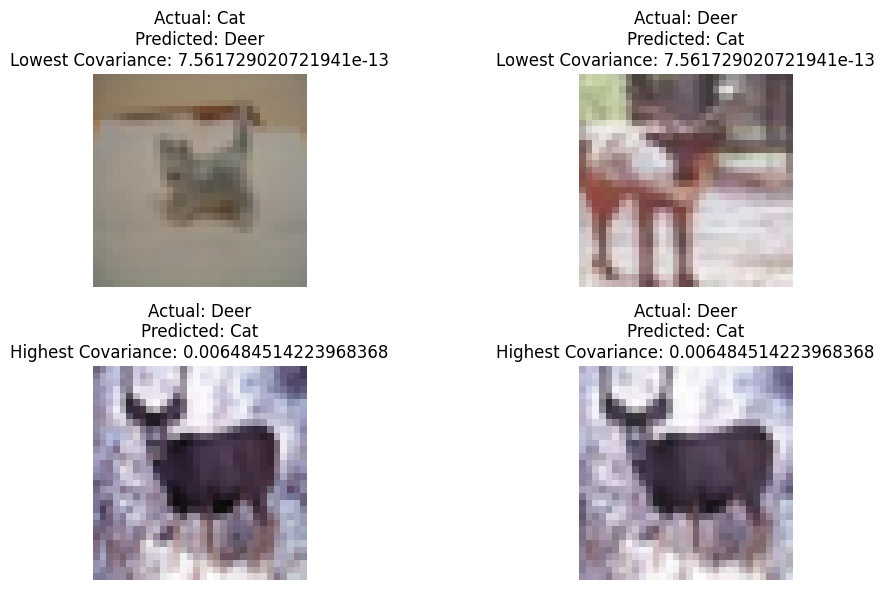

In [727]:
plot_similar(X_test,y_test,post_cov)

As expected the top pair of images look nothing alike, and the bottom two are strikingly similar (yet still unique). The high covariance shows that two images are likely to share a predicted label, since they have many features in common, and a low covariance implies few shared features.

# Computational cost

When considering the cost of the NNGP model, we should look at the intense operations, such as the large matrix multiplication, and the loops..
1. Matrix multiplication and operations: 
When computing the GP kernel the matrix operations dominate the overall cost, when initialising $K^0$ we have matrix multiplication of two datasets. This has complexity $O(MN^2)$ where M is the number of features per data point and N is the number of data points.
2. Loop:
The complexity of the loop is linear in L, since the kernel matrices were calculated outside of the loop the complexity of the loop is independent of the dataset size.
3. Matrix inversion of K_xx_noise:
This matrix inversion has time complexity $O(N_{train}^3)$

Clearly the dominating complexity is the inversion, which increases cubicly in the dataset size.
